In [296]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline


In [297]:
csv_file = "data/netflix_titles.csv"
netflix_data_df = pd.read_csv(csv_file)
netflix_data_df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [298]:
# netflix_data = netflix_data.drop(netflix_data.columns[11], axis=1)   
# netflix_data

netflix_data_df = netflix_data_df.drop(netflix_data_df.columns[[3, 4, 6, 11]], axis=1)
netflix_data_df

#removed director, cast, date_added, and description (uneccessary and too many null values)

,show_id,type,title,country,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016,NaN,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [299]:
#renaming two columns (type and listed_in) 

netflix_data_df.rename(columns = {'type':'entertainment type', 'listed_in':'genre'}, inplace = True)
netflix_data_df

,show_id,entertainment type,title,country,release_year,rating,duration,genre
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016,NaN,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [300]:
# # Filter for durations shorter than 60 minutes
# short_movies = netflix_data_df.loc[netflix_data_df["duration"] < 60 ,["duration"]]

# # Print the first 20 rows of short_movies
# short_movies.head(10)

In [301]:
#we are going to add values in null for country and rating
netflix_data_df.isnull().sum()

show_id                 0
entertainment type      0
title                   0
country               476
release_year            0
rating                 10
duration                0
genre                   0
dtype: int64

In [302]:
#counting the number of countries

country_count= netflix_data_df['country'].value_counts()
country_count


United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 554, dtype: int64

In [303]:
#replaced the null values with "united states"
netflix_data_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_data_df

,show_id,entertainment type,title,country,release_year,rating,duration,genre
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,NaN,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [304]:
#checking to reconfirm no null values in country column
netflix_data_df.isnull().sum()

show_id                0
entertainment type     0
title                  0
country                0
release_year           0
rating                10
duration               0
genre                  0
dtype: int64

In [305]:
#counting the highest rating based on the number of movies which is TV-MA and we will use this rating to fill any null values
#in rating column
rating_count= netflix_data_df['rating'].value_counts()
rating_count

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [306]:
netflix_data_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_data_df

,show_id,entertainment type,title,country,release_year,rating,duration,genre
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [355]:
netflix_data_df.duration.dtype

# dataTypeDict = dict(netflix_data_dfObj.dtypes)
# print('Data type of each column of Dataframe :')
# print(dataTypeDict)

dtype('float64')

<AxesSubplot:xlabel='release_year', ylabel='entertainment type'>

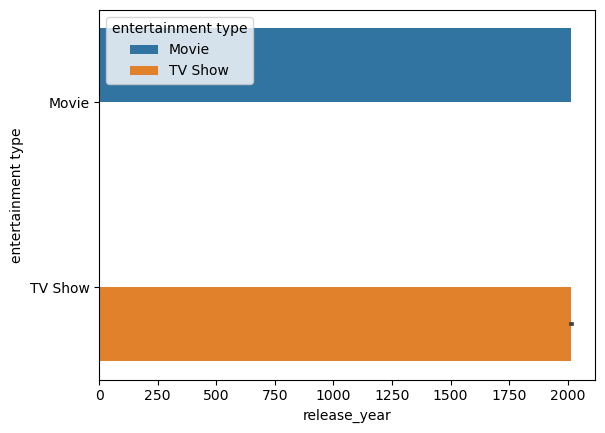

In [392]:
# plt.figure(figsize=(14,6))
# netflix_data_df[netflix_data_df["entertainment type"]["release_year"].value_counts().plot(kind="bar",color="Red")
# plt.title("Movies Released on Netflix ever the Years")
# plt.xlabel("Years")
# plt.ylabel("Number of Movies")

# plt.show()
# plt.figure(figsize=(14,6))
# sns.countplot(x='release_year',data = netflix_data_df,hue='entertainment type')

sns.barplot(data=netflix_data_df, x="release_year", y="entertainment type", hue="entertainment type")

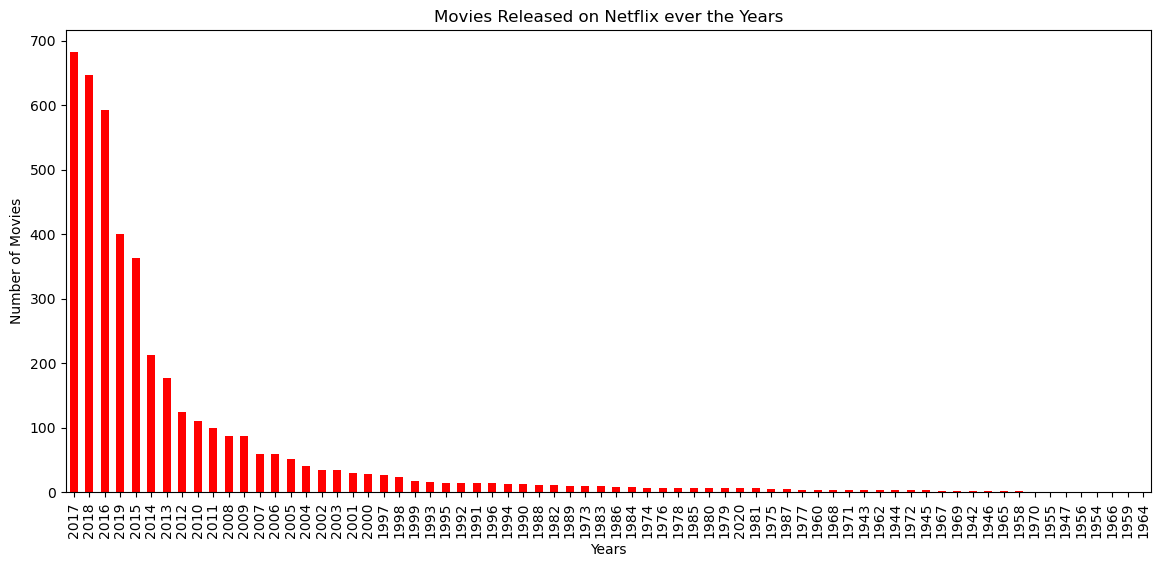

In [375]:

plt.figure(figsize=(14,6))
netflix_data_df[netflix_data_df["entertainment type"]=="Movie"]["release_year"].value_counts().plot(kind="bar",color="Red")
plt.title("Movies Released on Netflix ever the Years")
plt.xlabel("Years")
plt.ylabel("Number of Movies")

plt.show()

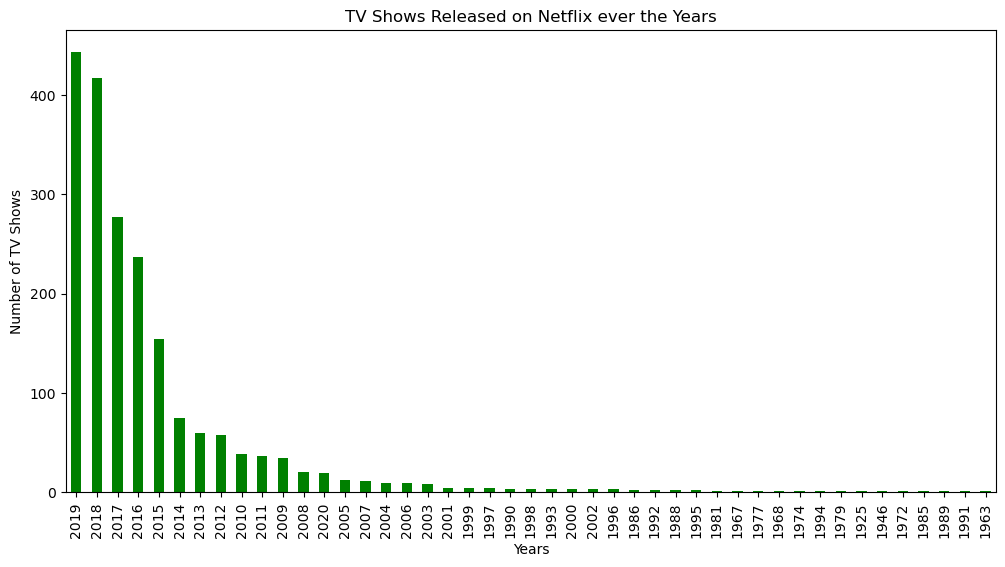

In [381]:
plt.figure(figsize=(12,6))
netflix_data_df[netflix_data_df["entertainment type"]=="TV Show"]["release_year"].value_counts().plot(kind="bar",color="Green")
plt.title("TV Shows Released on Netflix ever the Years")
plt.xlabel("Years")
plt.ylabel("Number of TV Shows")
plt.show()

In [307]:
netflix_data_df.isnull().sum()

show_id               0
entertainment type    0
title                 0
country               0
release_year          0
rating                0
duration              0
genre                 0
dtype: int64

In [334]:
# netflix_data_df['duration'] = pd.to_numeric(netflix_data_df['duration'], errors='coerce')

# netflix_data_df

In [335]:
# duplicate_data = netflix_data_df[netflix_data_df.duplicated(["show_id"])]
# duplicate_data

#there are no duplicate data in our dataset

In [336]:
netflix_type_count= netflix_data_df.groupby(["entertainment type"])["entertainment type"].count()
netflix_type_count


entertainment type
Movie      4265
TV Show    1969
Name: entertainment type, dtype: int64

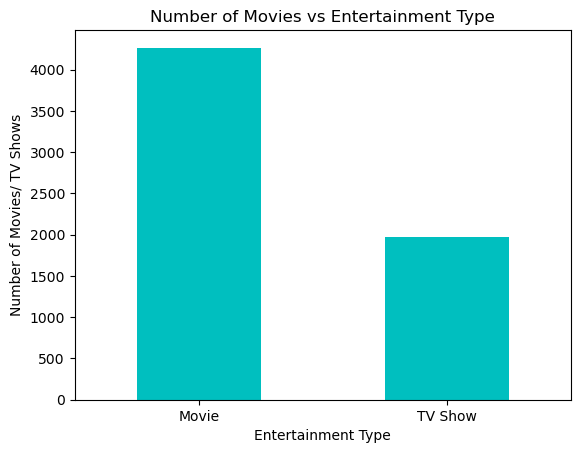

In [337]:
netflix_type_count.plot(x = "entertainment type", y = "entertainment type", kind = "bar", color='c') 
plt.title("Number of Movies vs Entertainment Type")
plt.xlabel("Entertainment Type",  )
plt.xticks(rotation="horizontal")
plt.ylabel("Number of Movies/ TV Shows")
plt.show()



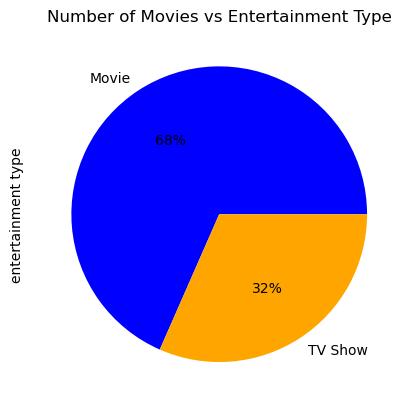

In [338]:
#2nd visual for entertainment type
netflix_type_count.plot.pie(autopct='%1.0f%%' , colors = ['blue', 'orange'],)

plt.title("Number of Movies vs Entertainment Type")
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

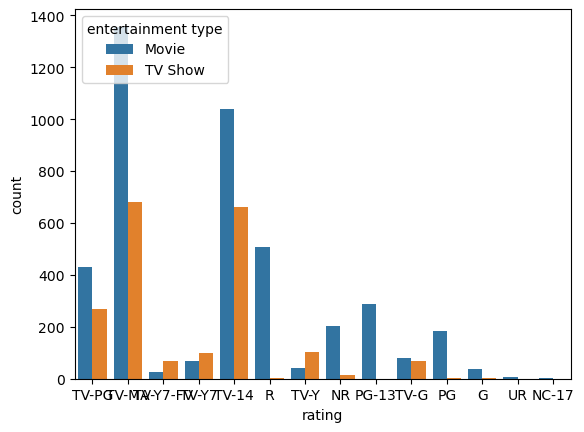

In [339]:
# sns.countplot(x='entertainment type',data = netflix_data_df, hue="rating")
sns.countplot(x='rating',data = netflix_data_df, hue="entertainment type")
# sns.countplot(x='country',data = netflix_data_df,hue='entertainment type')

In [340]:
# durations_df= netflix_data_df.groupby(["release_year"])["duration"].mean()
# durations_df


In [341]:
release_year_df= netflix_data_df.groupby(["release_year"])["release_year"].count()
release_year_df

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: release_year, Length: 72, dtype: int64

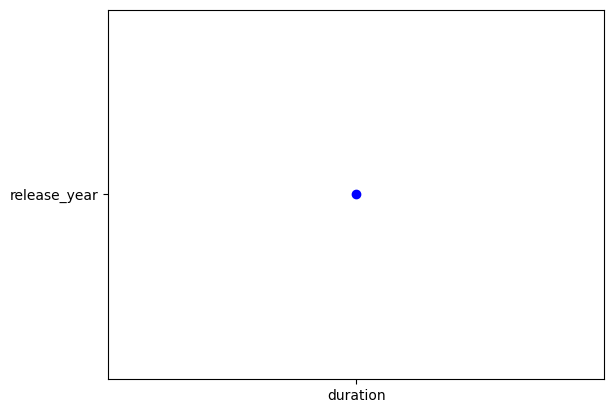

In [342]:
x ="duration"
y ="release-year"

plt.scatter(x = "duration", y = "release_year", c ="blue")

plt.show()

In [343]:
# x_axis = durations_df["duration"]
# release_year= release_year_df["release_year"]

# fig1, ax1 = plt.subplots()

# plt.plot(x_axis, release_year)
# plt.title('abc')
# plt.xlabel('abc')
# plt.ylabel('abc')

# #display
# plt.show()

In [344]:
netflix_genre_count= netflix_data_df.groupby(["genre"])["genre"].count()
netflix_genre_count

genre
Action & Adventure                                              68
Action & Adventure, Anime Features, Children & Family Movies     1
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        25
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        10
Thrillers                                                       40
Name: genre, Length: 461, dtype: int64

In [345]:
# # #define x-axis and y-axis
# # x_axis = netflix_genre_count["genre"]
# # entertainment_type = netflix_genre_count["release_year"]

# # fig1, ax1 = plt.subplots()

# # plt.plot(x_axis, entertainment_type)
# # plt.title('abc')
# # plt.xlabel('abc')
# # plt.ylabel('abc')

# # #display
# # plt.show()

# durations_df.plot.scatter(x='A', y='B', title= "Scatter plot between two variables X and Y");

# plot.show

In [346]:
# plt.scatter(netflix_data_df["release_year"], duration_df["duration"])

# # Create a title
# plt.title("Movie Duration by Year of Release")

# # Show the plot
# plt.show()

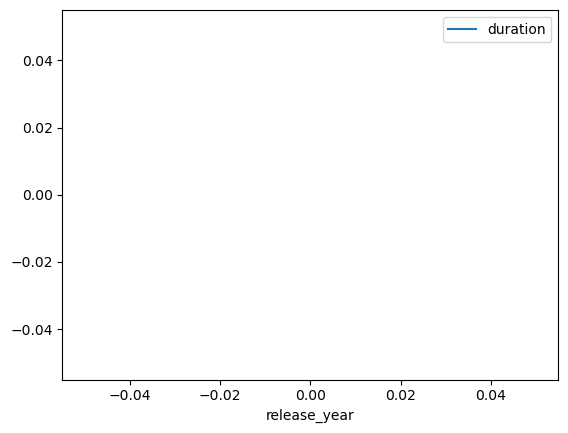

In [348]:
netflix_df_movies_only = netflix_data_df[netflix_data_df["entertainment type"] == "Movie"]

lines =netflix_df_movies_only.plot.line(x='release_year', y='duration')
plt.show()




# fig = plt.figure(figsize=(12,9))

# # Create a scatter plot of duration versus year
# plt.(netflix_df_movies_only["duration"], netflix_df_movies_only['release_year'])

# # Create a title
# plt.title("Movie Duration by Year of Release")

# # Show the plot
# plt.show()

#questions: 
# What content is available in different countries?
# Which genre is most watched?
# Highest-rated movie in a particular year?
# How many TV shows and movies are available for kids?


dataFrame.plot.bar(x="type", y="show", rot=70, title="Number of tourist visits - Year 2018");
plot.show(block=True);